# Set up

In [1]:
import pandas as pd
import numpy as np
import json
import pickle

# Load training data

In [2]:
df = pd.read_pickle('train_set.pkl')

# Sentiment Analysis

## TextBlob

In [3]:
from textblob import TextBlob

In [4]:
tb_claims = pd.DataFrame(df, columns=['claim', 'label'])
tb_claims

,claim,label
9389,While arguing over President Reagan’s 1981 tax...,1
1861,"Recently Rick Scott ""closed 30 women’s health ...",0
11035,Says Target installed urinals in a women’s bat...,0
12221,"Says ""combined doses of vaccines"" have never b...",0
11354,: The AMBER Alert system has been discontinu...,0
...,...,...
2910,Health insurance costs for Floridians are up 3...,1
6096,"A photograph captures Harriet Tubman as a ""Gun...",0
10446,"ISIS leader Abu Bakr al Baghdadi was ""released...",0
5414,"""The board of a nonprofit organization on whic...",1


In [5]:
for index, row in tb_claims.iterrows():
    claim = TextBlob(row['claim'])
    tb_claims.at[index,'subjectivity'] = claim.sentiment.subjectivity
    tb_claims.at[index,'polarity'] = claim.sentiment.polarity

In [6]:
tb_claims

,claim,label,subjectivity,polarity
9389,While arguing over President Reagan’s 1981 tax...,1,0.525568,0.23267
1861,"Recently Rick Scott ""closed 30 women’s health ...",0,0.175000,-0.05000
11035,Says Target installed urinals in a women’s bat...,0,0.000000,0.00000
12221,"Says ""combined doses of vaccines"" have never b...",0,0.000000,0.00000
11354,: The AMBER Alert system has been discontinu...,0,0.375000,-0.12500
...,...,...,...,...
2910,Health insurance costs for Floridians are up 3...,1,0.500000,0.50000
6096,"A photograph captures Harriet Tubman as a ""Gun...",0,0.000000,0.00000
10446,"ISIS leader Abu Bakr al Baghdadi was ""released...",0,0.000000,0.00000
5414,"""The board of a nonprofit organization on whic...",1,0.950000,0.55000


In [7]:
tb_false = tb_claims.loc[df['label'] == 0]
tb_partly = tb_claims.loc[df['label'] == 1]
tb_true = tb_claims.loc[df['label'] == 2]

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60f863def0>]],
      dtype=object)

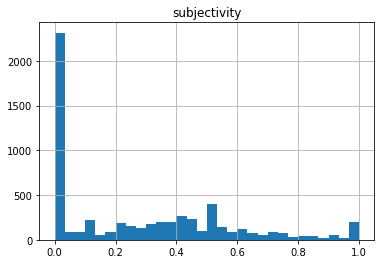

In [9]:
tb_false.hist(column='subjectivity', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f613cf0e5f8>]],
      dtype=object)

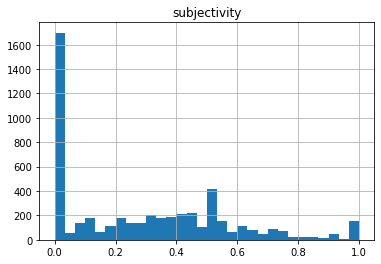

In [10]:
tb_partly.hist(column='subjectivity', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60f86c6978>]],
      dtype=object)

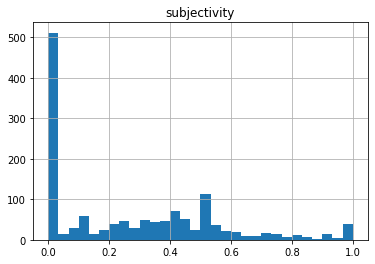

In [11]:
tb_true.hist(column='subjectivity', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60f86f9cc0>]],
      dtype=object)

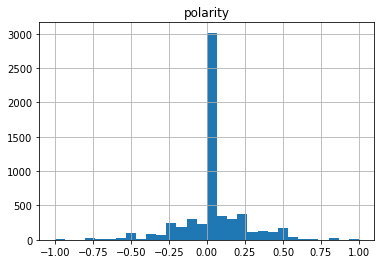

In [12]:
tb_false.hist(column='polarity', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60f8730860>]],
      dtype=object)

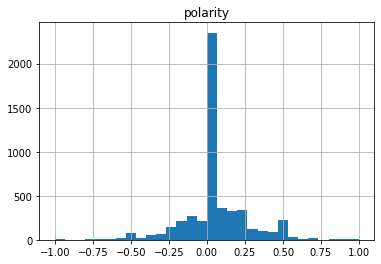

In [13]:
tb_partly.hist(column='polarity', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60f876c198>]],
      dtype=object)

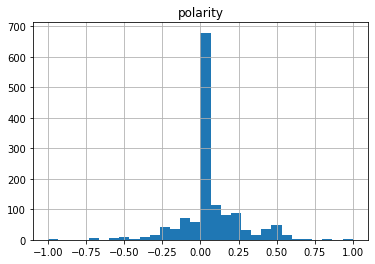

In [14]:
tb_true.hist(column='polarity', bins=30)

In [15]:
# Average subjectivity and polarity of claim types
false_subj = 0
false_polar = 0
partly_subj = 0
partly_polar = 0
true_subj = 0
true_polar = 0

for index, row in tb_claims.iterrows():
    if row['label'] == 0:
        false_subj += row['subjectivity']
        false_polar += row['polarity']
    elif row['label'] == 1:
        partly_subj += row['subjectivity']
        partly_polar += row['polarity']
    elif row['label'] == 2:
        true_subj += row['subjectivity']
        true_polar += row['polarity']

In [16]:
# Average subjectivity and polarity of claim types

N = len(tb_claims)
avg_false_subj = false_subj / N
avg_false_polar = false_polar / N
avg_partly_subj = partly_subj / N
avg_partly_polar = partly_polar / N
avg_true_subj = true_subj / N
avg_true_polar = true_polar / N

print('Average subjectivity of false claims:', avg_false_subj)
print('Average subjectivity of partly true claims:', avg_partly_subj)
print('Average subjectivity of true claims:', avg_true_subj)

print('Average polarity of false claims:', avg_false_polar)
print('Average polarity of partly true claims:', avg_partly_polar)
print('Average polarity of true claims:', avg_true_polar)

Average subjectivity of false claims: 0.129970943051167
Average subjectivity of partly true claims: 0.11755432583577513
Average subjectivity of true claims: 0.029531266508149773
Average polarity of false claims: 0.013572724876736601
Average polarity of partly true claims: 0.018835360344570312
Average polarity of true claims: 0.005606153922618969


In [17]:
# Median subjectivity and polarity of claim types
med_false_subj = []
med_false_polar = []
med_partly_subj = []
med_partly_polar = []
med_true_subj = []
med_true_polar = []

for index, row in tb_claims.iterrows():
    if row['label'] == 0:
        med_false_subj.append(row['subjectivity'])
        med_false_polar.append(row['polarity'])
    elif row['label'] == 1:
        med_partly_subj.append(row['subjectivity'])
        med_partly_polar.append(row['polarity'])
    elif row['label'] == 2:
        med_true_subj.append(row['subjectivity'])
        med_true_polar.append(row['polarity'])

In [18]:
import statistics
from statistics import median

median_false_subj = median(med_false_subj)
median_false_polar = median(med_false_polar)
median_partly_subj = median(med_partly_subj)
median_partly_polar = median(med_partly_polar)
median_true_subj = median(med_true_subj)
median_true_polar = median(med_true_polar)

In [19]:
print('Median false subjectivity:', median_false_subj)
print('Median false polarity:', median_false_polar)
print('Median partly subjectivity:', median_partly_subj)
print('Median partly polarity:', median_partly_polar)
print('Median true subjectivity:', median_true_subj)
print('Median true polarity:', median_true_polar)

Median false subjectivity: 0.21666666666666667
Median false polarity: 0.0
Median partly subjectivity: 0.26458333333333334
Median partly polarity: 0.0
Median true subjectivity: 0.22727272727272727
Median true polarity: 0.0


In [36]:
tb_polsub = tb_claims
for index, row in tb_polsub.iterrows():
    if row['polarity'] == 0 or row['subjectivity'] == 0:
        tb_polsub.at[index, 'pol-sub'] = 0
    else:
        tb_polsub.at[index, 'pol-sub'] = 1 / row['polarity'] * row['subjectivity']

In [38]:
tb_polsub

,claim,label,subjectivity,polarity,pol-sub
9389,While arguing over President Reagan’s 1981 tax...,1,0.525568,0.23267,2.258852
1861,"Recently Rick Scott ""closed 30 women’s health ...",0,0.175000,-0.05000,-3.500000
11035,Says Target installed urinals in a women’s bat...,0,0.000000,0.00000,0.000000
12221,"Says ""combined doses of vaccines"" have never b...",0,0.000000,0.00000,0.000000
11354,: The AMBER Alert system has been discontinu...,0,0.375000,-0.12500,-3.000000
...,...,...,...,...,...
2910,Health insurance costs for Floridians are up 3...,1,0.500000,0.50000,1.000000
6096,"A photograph captures Harriet Tubman as a ""Gun...",0,0.000000,0.00000,0.000000
10446,"ISIS leader Abu Bakr al Baghdadi was ""released...",0,0.000000,0.00000,0.000000
5414,"""The board of a nonprofit organization on whic...",1,0.950000,0.55000,1.727273


In [43]:
tb_polsub_false = tb_polsub.loc[tb_polsub['label'] == 0]
tb_polsub_partly = tb_polsub.loc[tb_polsub['label'] == 1]
tb_polsub_true = tb_polsub.loc[tb_polsub['label'] == 2]

In [53]:
tb_polsub_false.head(20)

,claim,label,subjectivity,polarity,pol-sub
1861,"Recently Rick Scott ""closed 30 women’s health ...",0,0.175000,-0.050000,-3.500000
11035,Says Target installed urinals in a women’s bat...,0,0.000000,0.000000,0.000000
12221,"Says ""combined doses of vaccines"" have never b...",0,0.000000,0.000000,0.000000
11354,: The AMBER Alert system has been discontinu...,0,0.375000,-0.125000,-3.000000
8662,"Judge Gonzalo Curiel ""is giving us very unfair...",0,1.000000,-0.650000,-1.538462
14307,Continental Airlines CEO Gordon Bethune once p...,0,0.433333,-0.033333,-13.000000
12687,Says a Washington Post reporter who broke news...,0,0.550000,-0.400000,-1.375000
9480,Disney animators hid a risqué image in sand du...,0,0.000000,0.000000,0.000000
13932,"“As many already said, certainly, this was the...",0,0.567857,0.395238,1.436747
14653,A photograph shows U.S. Rep. Alexandria Ocasio...,0,0.000000,0.000000,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60f4576e80>]],
      dtype=object)

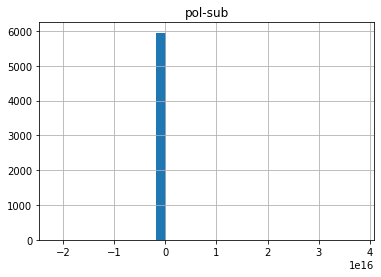

In [61]:
tb_polsub_false.hist(column='pol-sub', bins=30)

In [54]:
tb_polsub_partly.head(20)

,claim,label,subjectivity,polarity,pol-sub
9389,While arguing over President Reagan’s 1981 tax...,1,0.525568,0.232670,2.258852
31,"""Expanding Medicaid would require borrowing mo...",1,0.500000,0.500000,1.000000
6422,About half the people who would qualify for Me...,1,0.166667,-0.166667,-1.000000
9372,"The new Arizona immigration law ""says that any...",1,0.527273,0.168182,3.135135
3030,"""Today, Florida is in 50th place in spending o...",1,0.000000,0.000000,0.000000
12626,Our budget for health is 3% of the total budge...,1,0.750000,0.000000,0.000000
12525,"Says Ronald Reagan ""got the Saudis to flood th...",1,0.700000,0.400000,1.750000
154,"Says Charlie Crist wants felons who ""commit a ...",1,0.200000,0.033333,6.000000
6877,"Says she ""voted for a statewide fracking ban.""",1,0.000000,0.000000,0.000000
12607,"Under Rahm Emanuel, ""We’ve got tree trimmers m...",1,0.000000,0.000000,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60f45f2668>]],
      dtype=object)

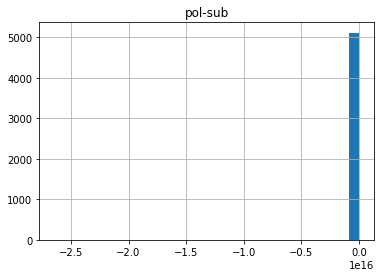

In [62]:
tb_polsub_partly.hist(column='pol-sub', bins=30)

In [56]:
tb_polsub_true.head(20)

,claim,label,subjectivity,polarity,pol-sub
12703,"Says Donald Trump's use of the term ""fake news...",2,1.000000,-0.500000,-2.000000
1298,"""Forty-three million Americans are on food sta...",2,0.000000,0.000000,0.000000
9890,A photograph shows an eagle catching a drone.,2,0.900000,0.600000,1.500000
3369,"A list of chemicals, written as if they were i...",2,0.633333,0.400000,1.583333
1018,The UK issued a travel advisory for LGBT citiz...,2,0.580556,-0.091667,-6.333333
6707,Your personal information may be viewable thro...,2,0.300000,0.000000,0.000000
6079,"""Austin is number one in Texas in startups, ve...",2,0.000000,0.000000,0.000000
6104,"The musical Mamma Mia! has ""been selling out f...",2,0.000000,0.000000,0.000000
8998,A Ghanaian immigrant and United States Army pr...,2,0.187500,0.000000,0.000000
772,Two Muslims hold positions in the U.S. Departm...,2,0.000000,0.000000,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60f458e0f0>]],
      dtype=object)

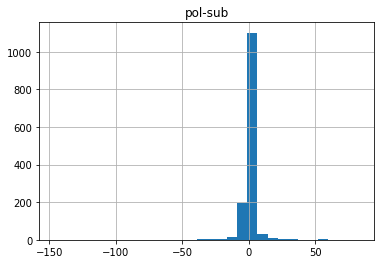

In [63]:
tb_polsub_true.hist(column='pol-sub', bins=30)

In [20]:
import nltk
nltk.download('movie_reviews')

tbnb_claims = pd.DataFrame(df, columns=['claim', 'label'])
tbnb_claims

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/alice/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


,claim,label
9389,While arguing over President Reagan’s 1981 tax...,1
1861,"Recently Rick Scott ""closed 30 women’s health ...",0
11035,Says Target installed urinals in a women’s bat...,0
12221,"Says ""combined doses of vaccines"" have never b...",0
11354,: The AMBER Alert system has been discontinu...,0
...,...,...
2910,Health insurance costs for Floridians are up 3...,1
6096,"A photograph captures Harriet Tubman as a ""Gun...",0
10446,"ISIS leader Abu Bakr al Baghdadi was ""released...",0
5414,"""The board of a nonprofit organization on whic...",1


In [21]:
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import Blobber

blobber = Blobber(analyzer=NaiveBayesAnalyzer())

for index, row in tbnb_claims.iterrows():
    claim = blobber(row['claim'])
    tbnb_claims.at[index,'classification'] = claim.sentiment.classification
    tbnb_claims.at[index,'p_pos'] = claim.sentiment.p_pos
    tbnb_claims.at[index,'p_neg'] = claim.sentiment.p_neg

In [22]:
tbnb_false = tbnb_claims.loc[tbnb_claims['label'] == 0]
tbnb_partly = tbnb_claims.loc[tbnb_claims['label'] == 1]
tbnb_true = tbnb_claims.loc[tbnb_claims['label'] == 2]

In [23]:
tbnb_false

,claim,label,classification,p_pos,p_neg
1861,"Recently Rick Scott ""closed 30 women’s health ...",0,neg,0.269427,0.730573
11035,Says Target installed urinals in a women’s bat...,0,pos,0.846297,0.153703
12221,"Says ""combined doses of vaccines"" have never b...",0,pos,0.832967,0.167033
11354,: The AMBER Alert system has been discontinu...,0,pos,0.911793,0.088207
8662,"Judge Gonzalo Curiel ""is giving us very unfair...",0,pos,0.831709,0.168291
...,...,...,...,...,...
12125,"Limiting labor negotiations to only wages is ""...",0,pos,0.997116,0.002884
8333,"President Ronald Reagan once said, “Nancy Pelo...",0,pos,0.958316,0.041684
11698,"""Transgender individuals in the U.S. have a 1-...",0,pos,0.502640,0.497360
6096,"A photograph captures Harriet Tubman as a ""Gun...",0,neg,0.261194,0.738806


In [24]:
tbnb_partly

,claim,label,classification,p_pos,p_neg
9389,While arguing over President Reagan’s 1981 tax...,1,pos,0.996789,0.003211
31,"""Expanding Medicaid would require borrowing mo...",1,pos,0.748123,0.251877
6422,About half the people who would qualify for Me...,1,pos,0.593187,0.406813
9372,"The new Arizona immigration law ""says that any...",1,pos,0.939287,0.060713
3030,"""Today, Florida is in 50th place in spending o...",1,pos,0.672018,0.327982
...,...,...,...,...,...
12899,"Says Chris Christie ""has refused to fund pensi...",1,neg,0.196957,0.803043
5974,"""We have right now, … in the state of Californ...",1,pos,0.775177,0.224823
2910,Health insurance costs for Floridians are up 3...,1,pos,0.651623,0.348377
5414,"""The board of a nonprofit organization on whic...",1,pos,0.912354,0.087646


In [25]:
tbnb_true

,claim,label,classification,p_pos,p_neg
12703,"Says Donald Trump's use of the term ""fake news...",2,neg,0.053204,0.946796
1298,"""Forty-three million Americans are on food sta...",2,pos,0.870120,0.129880
9890,A photograph shows an eagle catching a drone.,2,neg,0.456089,0.543911
3369,"A list of chemicals, written as if they were i...",2,pos,0.604910,0.395090
1018,The UK issued a travel advisory for LGBT citiz...,2,pos,0.999994,0.000006
...,...,...,...,...,...
8532,"""Public display of a long rifle is perfectly l...",2,pos,0.713640,0.286360
4722,"""I have never once raised the county tax levy ...",2,pos,0.647844,0.352156
3470,"Police in Wilmington, Delaware shot and killed...",2,pos,0.600181,0.399819
4879,A photograph shows the wedding of a U.S. Marin...,2,pos,0.740136,0.259864


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60f4963048>]],
      dtype=object)

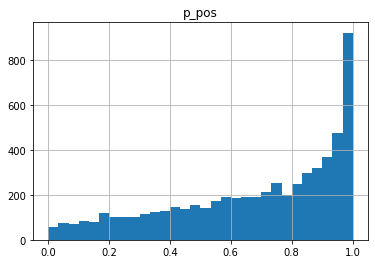

In [26]:
tbnb_false.hist(column='p_pos', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60f859c080>]],
      dtype=object)

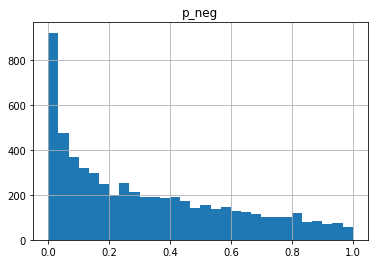

In [27]:
tbnb_false.hist(column='p_neg', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60f4910630>]],
      dtype=object)

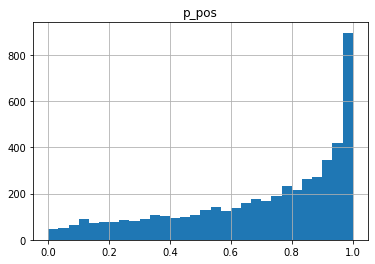

In [28]:
tbnb_partly.hist(column='p_pos', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60f491c6a0>]],
      dtype=object)

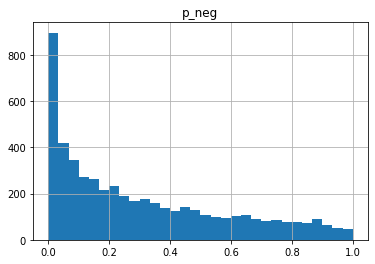

In [29]:
tbnb_partly.hist(column='p_neg', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60f490eba8>]],
      dtype=object)

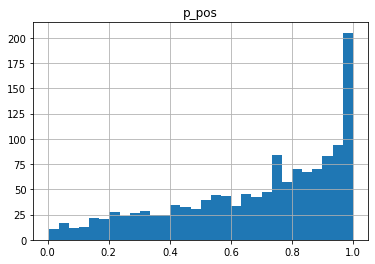

In [30]:
tbnb_true.hist(column='p_pos', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60f48cdda0>]],
      dtype=object)

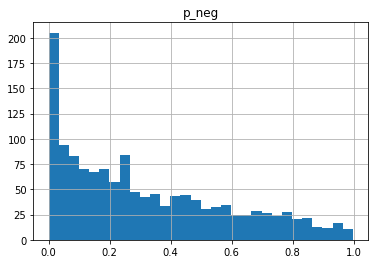

In [31]:
tbnb_true.hist(column='p_neg', bins=30)

## VADER

In [34]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/alice/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

In [36]:
sid.polarity_scores("That was an awful movie")

{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.4588}

In [37]:
score = sid.polarity_scores("That was an awful movie")
score['neg']

0.429

In [38]:
vader_claims = pd.DataFrame(df, columns=['claim', 'label'])
vader_claims

,claim,label
9389,While arguing over President Reagan’s 1981 tax...,1
1861,"Recently Rick Scott ""closed 30 women’s health ...",0
11035,Says Target installed urinals in a women’s bat...,0
12221,"Says ""combined doses of vaccines"" have never b...",0
11354,: The AMBER Alert system has been discontinu...,0
...,...,...
2910,Health insurance costs for Floridians are up 3...,1
6096,"A photograph captures Harriet Tubman as a ""Gun...",0
10446,"ISIS leader Abu Bakr al Baghdadi was ""released...",0
5414,"""The board of a nonprofit organization on whic...",1


In [39]:
for index, row in vader_claims.iterrows():
    claim = sid.polarity_scores(row['claim'])
    vader_claims.at[index,'negative'] = claim['neg']
    vader_claims.at[index,'neutral'] = claim['neu']
    vader_claims.at[index,'positive'] = claim['pos']
    vader_claims.at[index,'compound'] = claim['compound']

In [40]:
vader_claims

,claim,label,negative,neutral,positive,compound
9389,While arguing over President Reagan’s 1981 tax...,1,0.077,0.771,0.152,0.8020
1861,"Recently Rick Scott ""closed 30 women’s health ...",0,0.000,0.775,0.225,0.4939
11035,Says Target installed urinals in a women’s bat...,0,0.000,1.000,0.000,0.0000
12221,"Says ""combined doses of vaccines"" have never b...",0,0.000,1.000,0.000,0.0000
11354,: The AMBER Alert system has been discontinu...,0,0.000,0.845,0.155,0.2960
...,...,...,...,...,...,...
2910,Health insurance costs for Floridians are up 3...,1,0.000,1.000,0.000,0.0000
6096,"A photograph captures Harriet Tubman as a ""Gun...",0,0.000,1.000,0.000,0.0000
10446,"ISIS leader Abu Bakr al Baghdadi was ""released...",0,0.000,1.000,0.000,0.0000
5414,"""The board of a nonprofit organization on whic...",1,0.087,0.817,0.096,0.0516


In [41]:
vader_false = vader_claims.loc[vader_claims['label'] == 0]
vader_partly = vader_claims.loc[vader_claims['label'] == 1]
vader_true = vader_claims.loc[vader_claims['label'] == 2]

In [42]:
vader_false

,claim,label,negative,neutral,positive,compound
1861,"Recently Rick Scott ""closed 30 women’s health ...",0,0.000,0.775,0.225,0.4939
11035,Says Target installed urinals in a women’s bat...,0,0.000,1.000,0.000,0.0000
12221,"Says ""combined doses of vaccines"" have never b...",0,0.000,1.000,0.000,0.0000
11354,: The AMBER Alert system has been discontinu...,0,0.000,0.845,0.155,0.2960
8662,"Judge Gonzalo Curiel ""is giving us very unfair...",0,0.118,0.799,0.083,-0.2484
...,...,...,...,...,...,...
12125,"Limiting labor negotiations to only wages is ""...",0,0.000,1.000,0.000,0.0000
8333,"President Ronald Reagan once said, “Nancy Pelo...",0,0.000,1.000,0.000,0.0000
11698,"""Transgender individuals in the U.S. have a 1-...",0,0.000,0.833,0.167,0.2500
6096,"A photograph captures Harriet Tubman as a ""Gun...",0,0.000,1.000,0.000,0.0000


In [43]:
vader_partly

,claim,label,negative,neutral,positive,compound
9389,While arguing over President Reagan’s 1981 tax...,1,0.077,0.771,0.152,0.8020
31,"""Expanding Medicaid would require borrowing mo...",1,0.000,1.000,0.000,0.0000
6422,About half the people who would qualify for Me...,1,0.000,0.789,0.211,0.7506
9372,"The new Arizona immigration law ""says that any...",1,0.164,0.836,0.000,-0.5719
3030,"""Today, Florida is in 50th place in spending o...",1,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
12899,"Says Chris Christie ""has refused to fund pensi...",1,0.084,0.798,0.118,0.2263
5974,"""We have right now, … in the state of Californ...",1,0.000,1.000,0.000,0.0000
2910,Health insurance costs for Floridians are up 3...,1,0.000,1.000,0.000,0.0000
5414,"""The board of a nonprofit organization on whic...",1,0.087,0.817,0.096,0.0516


In [44]:
vader_true

,claim,label,negative,neutral,positive,compound
12703,"Says Donald Trump's use of the term ""fake news...",2,0.216,0.653,0.131,-0.2732
1298,"""Forty-three million Americans are on food sta...",2,0.000,1.000,0.000,0.0000
9890,A photograph shows an eagle catching a drone.,2,0.000,1.000,0.000,0.0000
3369,"A list of chemicals, written as if they were i...",2,0.000,1.000,0.000,0.0000
1018,The UK issued a travel advisory for LGBT citiz...,2,0.078,0.835,0.087,0.1680
...,...,...,...,...,...,...
8532,"""Public display of a long rifle is perfectly l...",2,0.000,0.584,0.416,0.6908
4722,"""I have never once raised the county tax levy ...",2,0.106,0.894,0.000,-0.1695
3470,"Police in Wilmington, Delaware shot and killed...",2,0.209,0.791,0.000,-0.6705
4879,A photograph shows the wedding of a U.S. Marin...,2,0.194,0.806,0.000,-0.3400


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32dc3e6390>]],
      dtype=object)

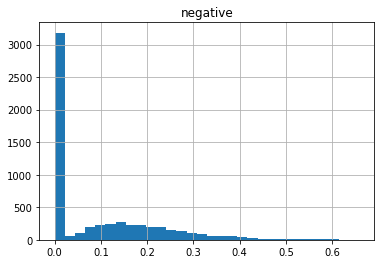

In [45]:
vader_false.hist(column='negative', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32dc3e6160>]],
      dtype=object)

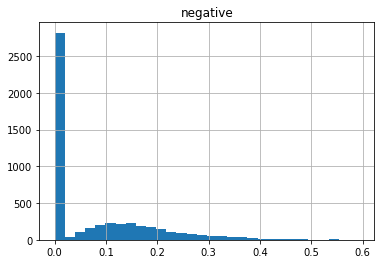

In [46]:
vader_partly.hist(column='negative', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32dc41d828>]],
      dtype=object)

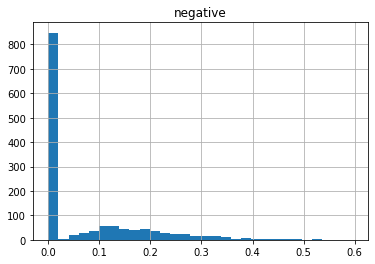

In [47]:
vader_true.hist(column='negative', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32dc42f320>]],
      dtype=object)

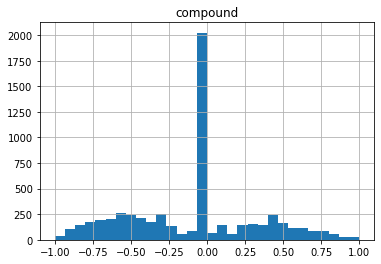

In [48]:
vader_false.hist(column='compound', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32dc4ad7b8>]],
      dtype=object)

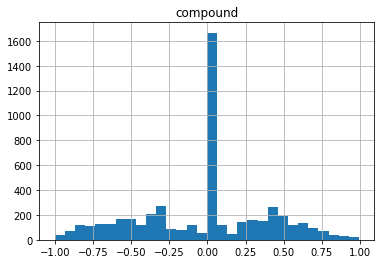

In [49]:
vader_partly.hist(column='compound', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32dc38e9b0>]],
      dtype=object)

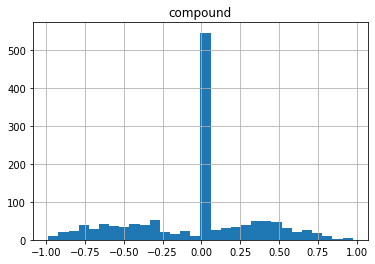

In [50]:
vader_true.hist(column='compound', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32dc383a90>]],
      dtype=object)

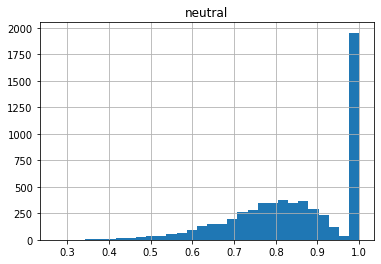

In [51]:
vader_false.hist(column='neutral', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32dc38eb70>]],
      dtype=object)

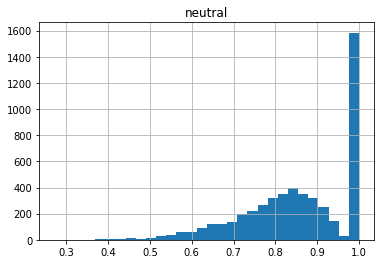

In [52]:
vader_partly.hist(column='neutral', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32dc41ae10>]],
      dtype=object)

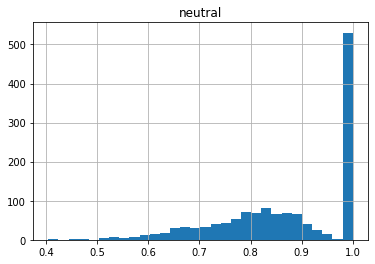

In [53]:
vader_true.hist(column='neutral', bins=30)